# Nearest Neighbor Classification

Nearest neighbor classification is a very intuitive method of classification: when faced with a new example, you would find past data that you have seen before that most resemble the current example and use that data as a "predictor".


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pprint

%matplotlib inline

# reads a csv file ignoring the first header row
# convert all fields to int
# returns a numpy array
def readCSV(fname):
    with open(fname, newline='') as csvfile:
        csvdata = csv.reader(csvfile, delimiter=',')
        i=0
        data=[]
        for row in csvdata:
            if i>0:
                data.append([int(col) for col in row])
            elif i==0:
                pprint.pprint(row)
            i = i+1
    return np.asarray(data)

fcdata=readCSV('train.csv')


['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']


## Explore the data 

* It's always a good idea to take a look at the scatter plot for some pairs of variables to get a feel of the data. 
* In this case, add the class label (forest cover type) information into the plot to get an idea of how the variables relate to the class label.
* What are we looking for?
* Given a new data point, which points in the data set would be the nearest neighbors?
* sklearn: [kNN](http://scikit-learn.org/stable/modules/neighbors.html)
* sklearn: [Preprocessing Data](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)
* What if we want to solve regression problems instead of classification?

Max Aspect = 360
Max Slope = 52
[[  5.00000000e-01   0.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.70588235e-01   4.94655843e-01   9.66718404e-01   1.00000000e+00]
 [  1.66666667e-01   8.66025404e-01   8.66025404e-01   1.00000000e+00]
 [  5.03921569e-01   9.99981027e-01   7.04925547e-01   1.00000000e+00]
 [  8.33333333e-01   8.66025404e-01   5.00000000e-01   1.00000000e+00]
 [  1.00000000e+00   4.94655843e-01   2.55842778e-01   1.00000000e+00]
 [  1.00000000e+00   1.22464680e-16   6.12323400e-17   1.00000000e+00]]


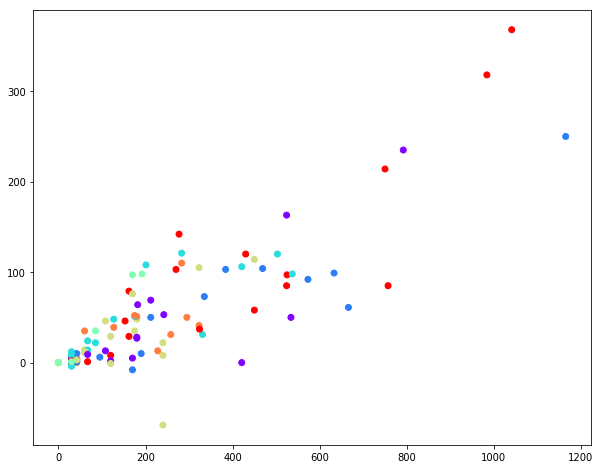

In [4]:
import matplotlib

print("Max Aspect = " + str( max(fcdata[:,2])))
print("Max Slope = " + str( max(fcdata[:,3])))


# take a random sample of the data to plot
datasubset = fcdata[np.random.choice(fcdata.shape[0],100,replace=False),:]

#print(np.random.choice(fcdata.shape[0],100,replace=False))

# create a set of colors for the 7 forest cover types
colors = matplotlib.cm.rainbow(np.linspace(0, 1, 7))
print(colors)
# assign the colors for the fc in the data set 
cs = [colors[row[55]-1] for row in datasubset]

plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(datasubset[:,4],datasubset[:,5],color=cs)

# Plot a point and draw a circle around it
#example = np.array([2800,25])
#circle1 = plt.Circle(example, 5, color='r',fill=False)
#ax = plt.gca()
#ax.plot(example[0], example[1], 'x', color='b')
#ax.add_artist(circle1)


plt.show()

## Splitting the data into training set and test set

* Ideally you want all 7 class labels to be represented (uniformly?)
* Randomly permute the data set of n rows
* Pick the first k rows as training and the second n-k rows as testing data
* sklearn: [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [5]:

# randomly permute the ordering of the data rows
permutedfcdata = np.random.permutation(fcdata)
print(permutedfcdata.shape)

# sanity check to make sure the fctype are uniformly represented
training = permutedfcdata[0:20]
print(training[:,-1])

# note the use of index slicing and the range notation
# ignore column #0 because that's just an ID
k=10000
trainingX = permutedfcdata[0:k,1:55]
trainingY = permutedfcdata[0:k,55]
print(trainingX.shape)
print(trainingY.shape)

testX = permutedfcdata[k:,1:55]
testY = permutedfcdata[k:,55]

# sanity check
print(testX.shape)
print(testY.shape)


(15120, 56)
[1 6 6 3 4 2 4 1 5 7 7 3 2 3 2 6 1 6 1 4]
(10000, 54)
(10000,)
(5120, 54)
(5120,)


## Fitting & Testing the kNN Model

* Training vs Test vs Validation
* Cross Validation using [sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainingX, trainingY) 

print("Accuracy = " + str(neigh.score(testX, testY)))

from sklearn.model_selection import cross_val_score

print(cross_val_score(neigh, permutedfcdata[:,0:55], permutedfcdata[:,55], cv=5))

Accuracy = 0.7962890625
[ 0.84160053  0.8287037   0.83234127  0.82936508  0.83035714]


## Saving a Model

* You'll be tweaking your features and model parameters for quite a bit
* Once you are happy with the model, you might want to save it (so that it can operationalized)
* Python has a default "serialization" module called [pickle](https://docs.python.org/3.1/library/pickle.html) that will let you take the sklearn model object and serialize it into string that can be written to a file that can be read and deserialized into the model later.
* sklearn: [persistence](http://scikit-learn.org/stable/modules/model_persistence.html)